In [ ]:
import mesa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from TalentLuck import LuckTalentModel

import powerlaw

from scipy.stats import linregress
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Running Talent vs. Luck Model

#### Small Run for Testing

In [3]:
testModel = LuckTalentModel(20, 20, 100, 50, 0.5, 0.6, 0.1)

while testModel.running:
    testModel.step()

In [4]:
df_test = testModel.datacollector.get_agent_vars_dataframe()
df_finalstep = df_test.xs(80, level="Step")[:100]

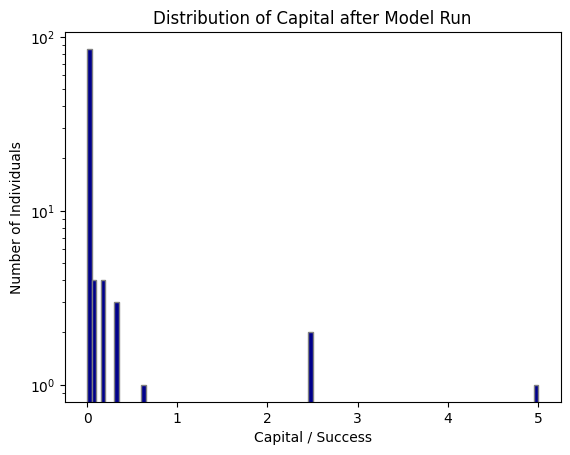

In [5]:
# Distribution of Final Capital

plt.hist(df_finalstep["Wealth"], bins = 100, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital after Model Run")
plt.show()

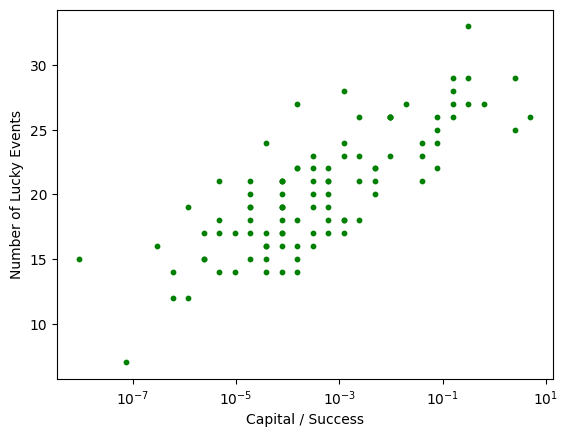

In [6]:
plt.scatter(df_finalstep["Wealth"], df_finalstep["luckyEvents"],
            s = 10, color = "green",)
plt.xscale("log")
plt.xlabel("Capital / Success")
plt.ylabel("Number of Lucky Events")
plt.show()

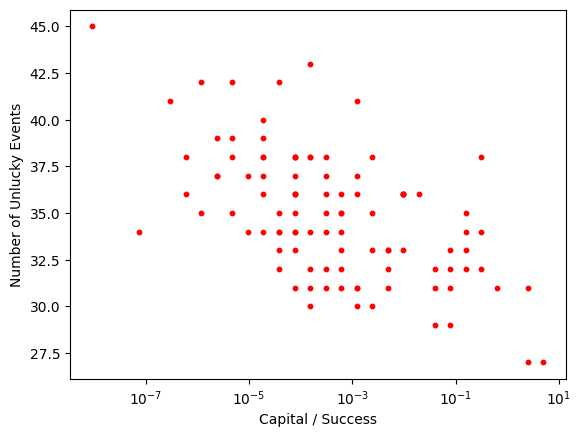

In [7]:
plt.scatter(df_finalstep["Wealth"], df_finalstep["unluckyEvents"],
            s = 10, color = "red",)
plt.xscale("log")
plt.xlabel("Capital / Success")
plt.ylabel("Number of Unlucky Events")
plt.show()

### Small Run with inequal Starting Capital

In [8]:
inequalModel = LuckTalentModel(20, 20, 100, 50, 0.5, 0.6, 0.1, 5000, 2000)

while inequalModel.running:
    inequalModel.step()

In [9]:
df_inequal = inequalModel.datacollector.get_agent_vars_dataframe()
df_finalstep_ie = df_inequal.xs(80, level="Step")[:100]

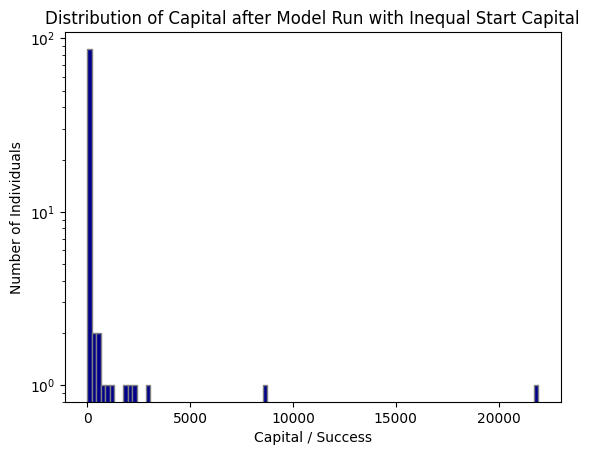

In [10]:
# Distribution of Final Capital

plt.hist(df_finalstep_ie["Wealth"], bins = 100, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital after Model Run with Inequal Start Capital")
plt.show()

np.float64(0.13574362275621757)

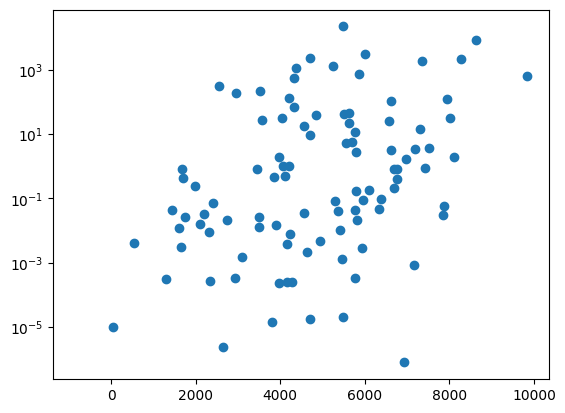

In [11]:
# Comparison Start Capital with Final 
df_firststep_ie = df_inequal.xs(0, level="Step")[:100]
plt.scatter(df_firststep_ie["Wealth"], df_finalstep_ie["Wealth"])
plt.yscale("log")

df_firststep_ie["Wealth"].corr(df_finalstep_ie["Wealth"])

#### First Run as in Paper

In [3]:
firstModel = LuckTalentModel(201, 201, 1000, 500, 0.5, 0.6, 0.1)

while firstModel.running:
    firstModel.step()

In [13]:
df_agents = firstModel.datacollector.get_agent_vars_dataframe()
df_finalstep = df_agents.xs(80, level="Step")[:1000]

In [ ]:
# save data of model run for later analysis
# commented out to not overwrite the file
# df_finalstep.to_csv("data/singlerun_equalstart.csv")

In [13]:
# read data in again

df_finalstep = pd.read_csv("data/singlerun_equalstart.csv")
df_finalstep

,AgentID,Wealth,Talent,luckyEvents,unluckyEvents
0,1,0.3125,0.569833,1.0,6.0
1,2,10.0000,0.422026,3.0,3.0
2,3,2.5000,0.586492,3.0,5.0
3,4,0.3125,0.612497,3.0,8.0
4,5,2.5000,0.522611,2.0,4.0
...,...,...,...,...,...
995,996,1.2500,0.580710,3.0,6.0
996,997,0.6250,0.762589,3.0,7.0
997,998,2.5000,0.483182,0.0,2.0
998,999,0.3125,0.477962,1.0,6.0


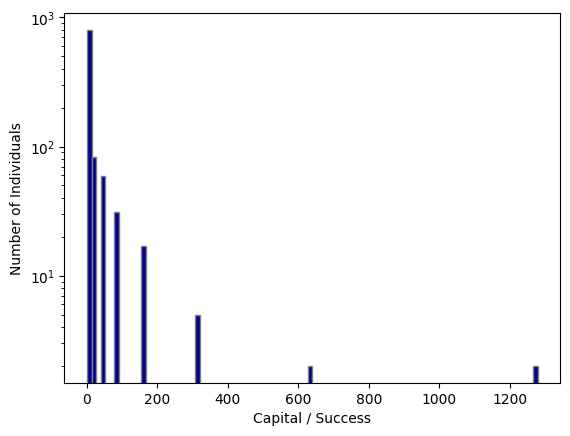

In [14]:
# Distribution of Final Capital

plt.hist(df_finalstep["Wealth"], bins = 100, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.show()

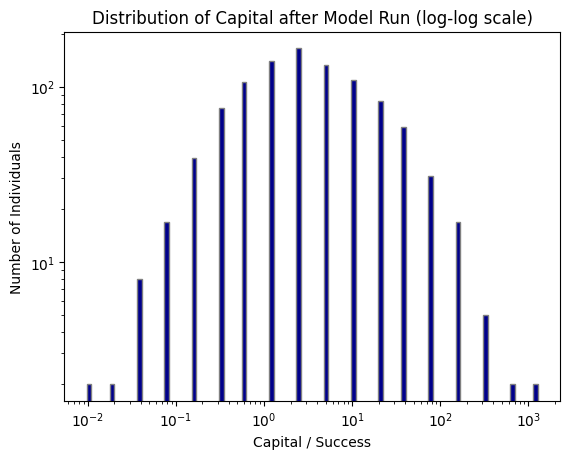

In [6]:
# Distribution of Final Capital in log log scale
bins = np.logspace(np.log10(df_finalstep["Wealth"].min()), 
                   np.log10(df_finalstep["Wealth"].max()), 100)

plt.hist(df_finalstep["Wealth"], bins = bins, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital after Model Run (log-log scale)")
plt.show()

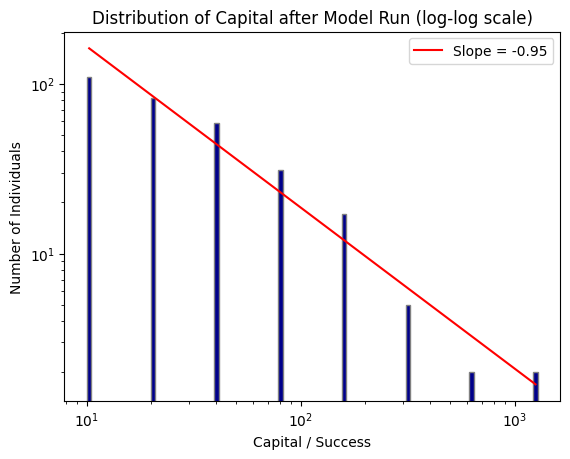

In [ ]:
# Distribution of tail of final capital in log log scale


# Filter data to only look at tail
df_finalstep_red = df_finalstep[df_finalstep["Wealth"] > 5]

# Log-spaced bins
bins = np.logspace(np.log10(df_finalstep_red["Wealth"].min()), 
                   np.log10(df_finalstep_red["Wealth"].max()), 100)

# Counts and bin edges of histograms for fitting a line
counts, bin_edges = np.histogram(df_finalstep_red["Wealth"], bins=bins)

# Compute bin centers
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

# Remove zero counts 
nonzero = counts > 0
x = np.log10(bin_centers[nonzero])
y = np.log10(counts[nonzero])

# Linear regression on log-log values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot histogram
plt.hist(df_finalstep_red["Wealth"], bins=bins, color="darkblue", edgecolor="grey")
plt.xscale("log")
plt.yscale("log")

# Plot fitted line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(10**x_line, 10**y_line, color="red", label=f"Slope = {slope:.2f}")

plt.xlabel("Capital / Success")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Capital after Model Run (log-log scale)")
plt.legend()
plt.show()


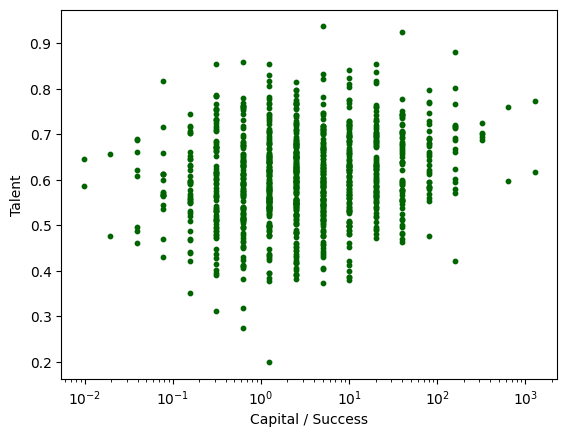

In [ ]:
# Plotting relationship between Wealth and Talent as Scatterplot

plt.scatter(df_finalstep["Wealth"], df_finalstep["Talent"],
            s = 10, color = "darkgreen",)
plt.xscale("log")
plt.xlabel("Capital / Success")
plt.ylabel("Talent")
plt.show()

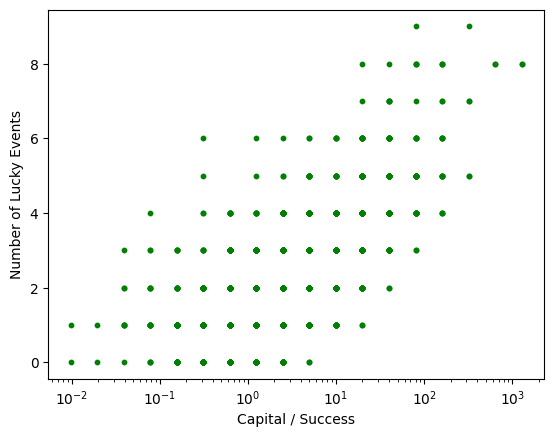

In [ ]:
# Relationship between Wealth and lucky events as scatterplot

plt.scatter(df_finalstep["Wealth"], df_finalstep["luckyEvents"],
            s = 10, color = "green",)
plt.xscale("log")
plt.xlabel("Capital / Success")
plt.ylabel("Number of Lucky Events")
plt.show()

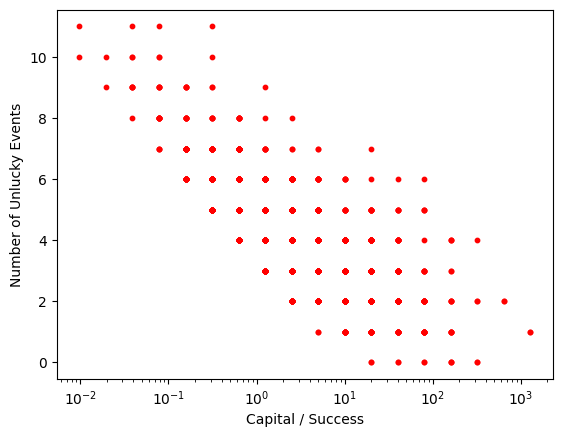

In [ ]:
# Relationship between Wealth and unlucky events as scatterplot

plt.scatter(df_finalstep["Wealth"], df_finalstep["unluckyEvents"],
            s = 10, color = "red",)
plt.xscale("log")
plt.xlabel("Capital / Success")
plt.ylabel("Number of Unlucky Events")
plt.show()

### Model Run with inequal Starting Capital

In [4]:
inequalModel = LuckTalentModel(201, 201, 1000, 500, 0.5, 0.6, 0.1, 2000, 500)

while inequalModel.running:
    inequalModel.step()

In [20]:
df_inequal = inequalModel.datacollector.get_agent_vars_dataframe()
df_finalstep_ie = df_inequal.xs(80, level="Step")[:1000]
df_firststep_ie = df_inequal.xs(0, level="Step")[:1000]

In [21]:
df_finalstep_ie["startingCapital"] = df_firststep_ie["Wealth"]
df_finalstep_ie

,Wealth,Talent,luckyEvents,unluckyEvents,startingCapital
AgentID,,,,,
1,4154.784262,0.605880,3.0,2.0,2077.392131
2,95.490437,0.607625,2.0,6.0,1527.846985
3,747.124737,0.685892,3.0,4.0,1494.249474
4,299.460031,0.472511,3.0,6.0,2395.680246
5,10366.327076,0.680795,3.0,1.0,2591.581769
...,...,...,...,...,...
996,541.408645,0.525640,3.0,5.0,2165.634581
997,1525.917887,0.668860,6.0,7.0,3051.835774
998,1045.899963,0.623930,3.0,3.0,1045.899963


In [ ]:
# save data of model run for later analysis
# commented out to not overwrite the file
# df_finalstep_ie.to_csv("data/singlerun_unequalstart.csv")

In [16]:
# read data in again

df_finalstep_ie = pd.read_csv("data/singlerun_unequalstart.csv")
df_finalstep_ie

,AgentID,Wealth,Talent,luckyEvents,unluckyEvents,startingCapital
0,1,4154.784262,0.605880,3.0,2.0,2077.392131
1,2,95.490437,0.607625,2.0,6.0,1527.846985
2,3,747.124737,0.685892,3.0,4.0,1494.249474
3,4,299.460031,0.472511,3.0,6.0,2395.680246
4,5,10366.327076,0.680795,3.0,1.0,2591.581769
...,...,...,...,...,...,...
995,996,541.408645,0.525640,3.0,5.0,2165.634581
996,997,1525.917887,0.668860,6.0,7.0,3051.835774
997,998,1045.899963,0.623930,3.0,3.0,1045.899963
998,999,18195.321516,0.589772,5.0,2.0,2274.415190


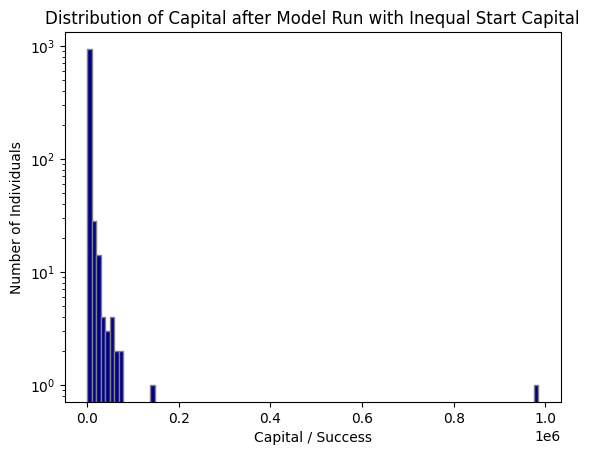

In [17]:
# Distribution of Final Capital

plt.hist(df_finalstep_ie["Wealth"], bins = 100, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital after Model Run with Inequal Start Capital")
plt.show()

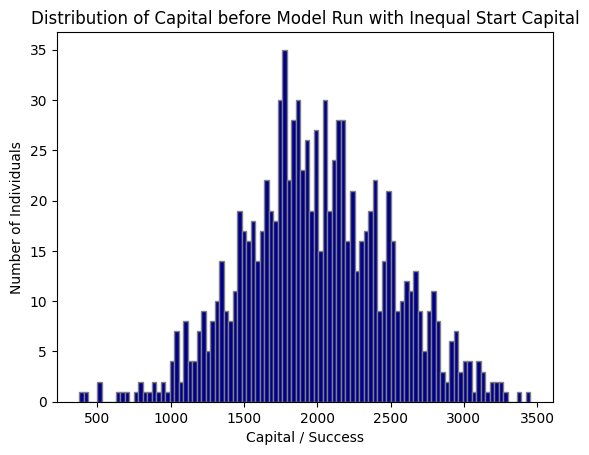

In [18]:
# Distribution of Starting Capital

plt.hist(df_finalstep_ie["startingCapital"], bins = 100, color = "darkblue", edgecolor = "grey")
# plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital before Model Run with Inequal Start Capital")
plt.show()

np.float64(0.01052720873697795)

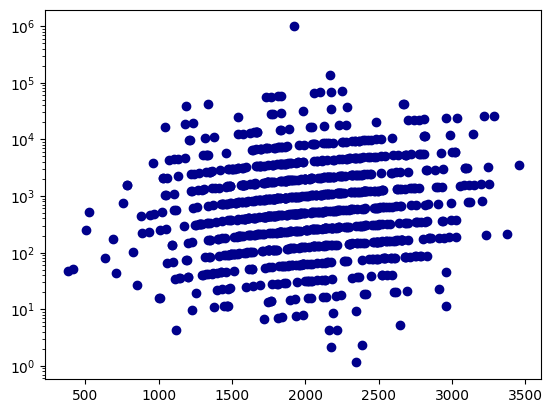

In [19]:
# Comparison Start Capital with Final 
plt.scatter(df_finalstep_ie["startingCapital"], df_finalstep_ie["Wealth"], 
            color = "darkblue")
plt.yscale("log")

df_finalstep_ie["startingCapital"].corr(df_finalstep_ie["Wealth"])

In [ ]:
# Linear regression to look at the importance of predictors


# independent variables
X = df_finalstep_ie[["luckyEvents", "unluckyEvents", "startingCapital", "Talent"]]
X = sm.add_constant(X)
# wealth as dependent variable
y = np.log1p(df_finalstep_ie["Wealth"])

# fit model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Wealth   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.826e+05
Date:                Fri, 04 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:43:43   Log-Likelihood:                 1259.2
No. Observations:                1000   AIC:                            -2508.
Df Residuals:                     995   BIC:                            -2484.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4626      0.017    3

R2 Score: 0.9892364554904277


<Axes: title={'center': 'Feature Importance Scores from Random Forest Regressor'}>

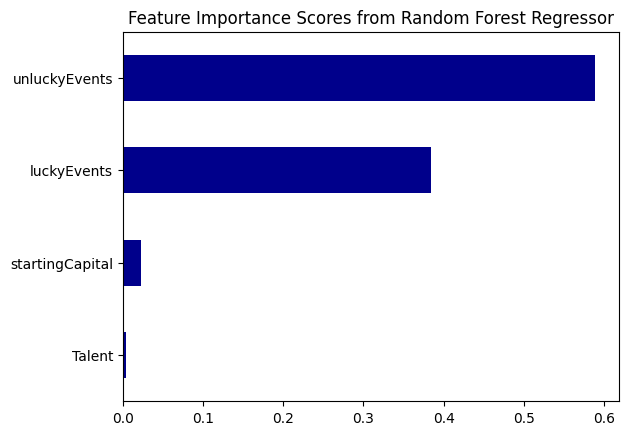

In [ ]:
## Predicting Final Wealth with Random Forest Regressor


# defining variables
X = df_finalstep_ie[["luckyEvents", "unluckyEvents", "startingCapital", "Talent"]]
y = np.log1p(df_finalstep_ie["Wealth"])

# splitting in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fitting model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# goodness of fit
print("R2 Score:", r2_score(y_test, rf.predict(X_test)))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title= "Feature Importance Scores from Random Forest Regressor", color = "darkblue")


### Batch Running

In [ ]:
# Running model with same parameters 10 times

model_params = {
    "height": 201,
    "width": 201,
    "n_events": 500,
    "prop_lucky": 0.5,
    "n_actors": 1000,
    "mean_talent": 0.6,
    "sd_talent": 0.1,
    "mean_start_capital": 2000,
    "sd_start_capital": 500
}

results = mesa.batch_run(
    LuckTalentModel,
    parameters= model_params,
    iterations = 10, # specifying number of iterations
    number_processes=None,
    data_collection_period=1,
    display_progress= True
)


  0%|          | 0/10 [00:00<?, ?it/s]

In [27]:
results_df = pd.DataFrame(results)
results_df.head()

,RunId,iteration,Step,height,width,n_events,prop_lucky,n_actors,mean_talent,sd_talent,mean_start_capital,sd_start_capital,Gini,Min / Max,AgentID,Wealth,Talent,luckyEvents,unluckyEvents
0,1,1,0,201,201,500,0.5,1000,0.6,0.1,2000,500,0.141706,"[280.9030508642488, 3566.607580178428]",1,2049.865923,0.716154,0.0,0.0
1,1,1,0,201,201,500,0.5,1000,0.6,0.1,2000,500,0.141706,"[280.9030508642488, 3566.607580178428]",2,1998.302517,0.616456,0.0,0.0
2,1,1,0,201,201,500,0.5,1000,0.6,0.1,2000,500,0.141706,"[280.9030508642488, 3566.607580178428]",3,1923.900827,0.488960,0.0,0.0
3,1,1,0,201,201,500,0.5,1000,0.6,0.1,2000,500,0.141706,"[280.9030508642488, 3566.607580178428]",4,1781.577080,0.446309,0.0,0.0
4,1,1,0,201,201,500,0.5,1000,0.6,0.1,2000,500,0.141706,"[280.9030508642488, 3566.607580178428]",5,1556.878902,0.546867,0.0,0.0


In [ ]:
# only storing data of final step and only for agents (excluding the events)
agents_final_step = results_df[(results_df["Step"] == 79) & (~results_df["Talent"].isna())]

In [ ]:
# store data of multiple simulation run
# commented out such that it is not overwritten
# agents_final_step.to_csv("data/multiplerun.csv", index=False)

In [38]:
df_multiplerun = pd.read_csv("data/multiplerun.csv")

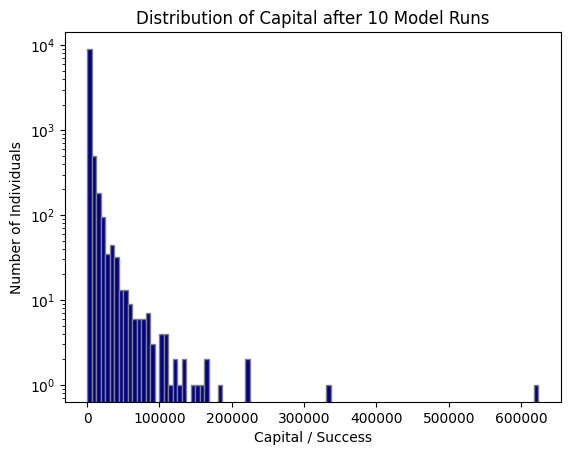

In [39]:
# Distribution of Final Capital

plt.hist(df_multiplerun["Wealth"], bins = 100, color = "darkblue", edgecolor = "grey")
plt.yscale("log")
plt.ylabel("Number of Individuals")
plt.xlabel("Capital / Success")
plt.title("Distribution of Capital after 10 Model Runs")
plt.show()

### Analysing Distributions

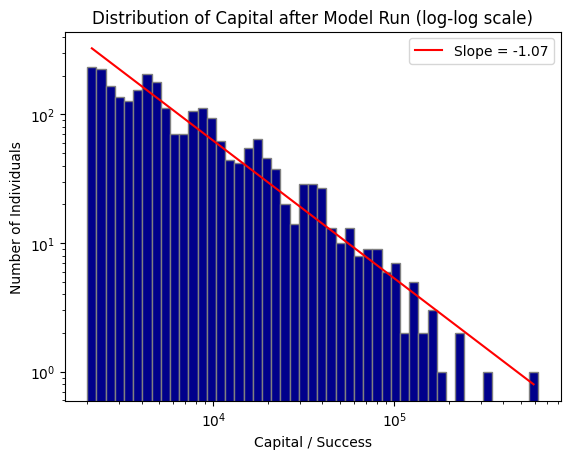

In [ ]:
# Distribution of tail of final capital in log log scale

# Filter data to only look at tail
df_red = df_multiplerun[df_multiplerun["Wealth"] > 2000]

# Log-spaced bins
bins = np.logspace(np.log10(df_red["Wealth"].min()), 
                   np.log10(df_red["Wealth"].max()), 50)

# Counts and bin edges of histograms for fitting a line
counts, bin_edges = np.histogram(df_red["Wealth"], bins=bins)

# Compute bin centers
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

# Remove zero counts 
nonzero = counts > 0
x = np.log10(bin_centers[nonzero])
y = np.log10(counts[nonzero])

# Linear regression on log-log values
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot histogram
plt.hist(df_red["Wealth"], bins=bins, color="darkblue", edgecolor="grey")
plt.xscale("log")
plt.yscale("log")

# Plot fitted line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept
plt.plot(10**x_line, 10**y_line, color="red", label=f"Slope = {slope:.2f}")

plt.xlabel("Capital / Success")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Capital after Model Run (log-log scale)")
plt.legend()
plt.show()

In [ ]:
# extracting wealth and sorting it for later processing
wealth_data = list(df_multiplerun["Wealth"])
wealth_data.sort()

# fitting powerlaw distribution
fitting_results = powerlaw.Fit(wealth_data)


# Power law parameters
alpha = fitting_results.power_law.alpha
xmin = fitting_results.power_law.xmin
print("Power law fit -> Alpha:", alpha, ", xmin:", xmin)

# Lognormal parameters
mu = fitting_results.lognormal.mu
sigma = fitting_results.lognormal.sigma
print("Lognormal fit -> Mu:", mu, ", Sigma:", sigma)


# fit for power law
print("Fit of power law", fitting_results.D)

# Compare distributions
R, p = fitting_results.distribution_compare('power_law', 'lognormal')
print("Comparison (Power law vs Lognormal): R =", R, ", p =", p)

Calculating best minimal value for power law fit
Power law fit -> Alpha: 2.748172410352499 , xmin: 29449.53569888592
Lognormal fit -> Mu: 6.3346727321521215 , Sigma: 1.6929868629264853
0.0415759675952001
Comparison (Power law vs Lognormal): R = -0.7046628416372798 , p = 0.4996529337534641


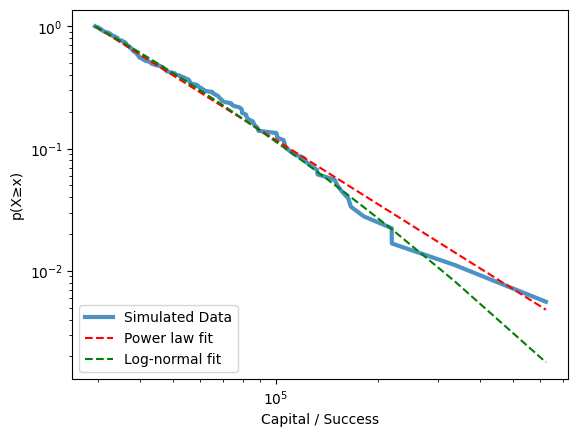

In [61]:
## looking at the CCDF of empirical data vs fitted distributions

# using power law package
fig = fitting_results.plot_ccdf(linewidth=3, label='Simulated Data', alpha = 0.8)
fitting_results.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fitting_results.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Log-normal fit')

# setting labels and legend
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Capital / Success")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)


#### Pareto Principle

In [ ]:
# cutting data between lowest 80 and 20%
lowest_80 = wealth_data[:800]
highest_20 = wealth_data[800:]
highest_5 = wealth_data[950:]

sum_lowest = sum(lowest_80)
sum_highest = sum(highest_20)
sum_highest_5 = sum(highest_5)
sum_total = sum(wealth_data)

# calculating shares of total wealth
share_lowest = sum_lowest / sum_total * 100
share_highest = sum_highest / sum_total * 100
share_highest_5 = sum_highest_5 / sum_total * 100

In [28]:
print("Poorest 80 % own", sum_lowest, "which means", round(share_lowest, 2), "% of total wealth")
print("Richest 20 % own", sum_highest,"which means",  round(share_highest, 2), "% of total wealth")

Poorest 80 % own 2449.04296875 which means 14.31 % of total wealth
Richest 20 % own 14670.0 which means 85.69 % of total wealth


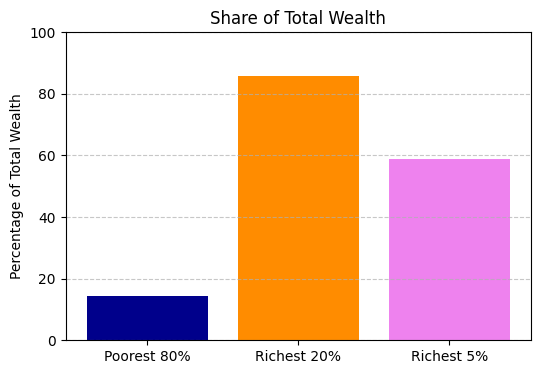

In [37]:
# Data
groups = ['Poorest 80%', 'Richest 20%', 'Richest 5%']
percent_wealth = [share_lowest, share_highest, share_highest_5]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(groups, percent_wealth, color=['darkblue', 'darkorange', "violet"])
plt.ylabel('Percentage of Total Wealth')
plt.title('Share of Total Wealth')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Pareto Principle for unequal starting Capital

In [42]:
# extracting wealth and sorting it for later processing
wealth_data_ie = list(df_finalstep_ie["Wealth"])
wealth_data_ie.sort()

lowest_80 = wealth_data_ie[:800]
highest_20 = wealth_data_ie[800:]
highest_5 = wealth_data_ie[950:]

sum_lowest = sum(lowest_80)
sum_highest = sum(highest_20)
sum_highest_5 = sum(highest_5)
sum_total = sum(wealth_data_ie)

share_lowest = sum_lowest / sum_total * 100
share_highest = sum_highest / sum_total * 100
share_highest_5 = sum_highest_5 / sum_total * 100

In [43]:
print("Poorest 80 % own", sum_lowest, "which means", round(share_lowest, 2), "% of total wealth")
print("Richest 20 % own", sum_highest,"which means",  round(share_highest, 2), "% of total wealth")

Poorest 80 % own 518140.9701474518 which means 13.32 % of total wealth
Richest 20 % own 3370585.9949003854 which means 86.68 % of total wealth


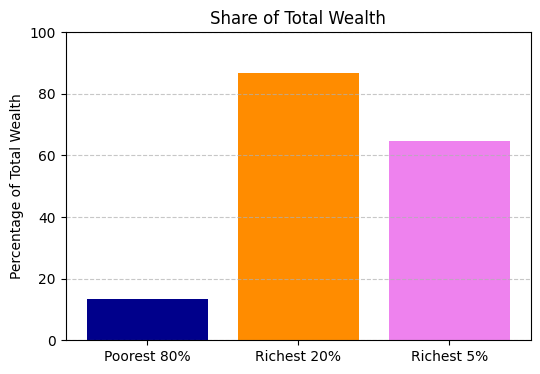

In [44]:
# Data
groups = ['Poorest 80%', 'Richest 20%', 'Richest 5%']
percent_wealth = [share_lowest, share_highest, share_highest_5]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(groups, percent_wealth, color=['darkblue', 'darkorange', "violet"])
plt.ylabel('Percentage of Total Wealth')
plt.title('Share of Total Wealth')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()